<h1 align=center>CMSC 441 Project 1: Divide and Conquer using Karatsuba's Algorithm</h1>
<h3 align=center>By: Jerson Guansing</h3>

<h3 align=center>
ABSTRACT
</h3>
The main purpose of this project is to implement an efficient, divide-and-conquer algorithm for multiplication of large integers. For this project, we describe, determine and compare the running times of the standard "grade school" multiplication against the Karatsuba's method for large two n-digit number multiplication. The functions that must be implemented for the Karatsuba's method are fastMul() and fastMulArray(). The general pseudocode have been provided in the lecture notes. However, the implementation of the functions will affect its performance. Then, running time results will be analyzed for both algorithms with varying n-digit size to determine when does Karatsuba's method become faster. Asymptotically, we expect fastMul() to be faster than the standard multiplication method with a sufficiently large n-digit size, but mul() could be faster for smaller numbers. The analysis of the experimental result determines the crossover point which is the lower bound or point where the efficiency of both algorithms flip. Furthermore, the result supports the theoretical expectation that as the n-digit size increases from the crossover point, then Karatsuba's method become more efficient.

<h3 align=center>
BACKGROUND
</h3>
The Karatsuba's method is a fast, divide-and-conquer algorithm for multiplication that we discussed in class. It was discovered by Anatoly Karatsuba in 1960 (<a href="https://en.wikipedia.org/wiki/Karatsuba_algorithm">source</a>) to reduce single digit multiplications. <br/><br/>
Based from the lecture notes, the standard "grade school" multiplication has a running time of $\theta{(n^2)}$ to multiply two n-digit numbers. However, Karatsuba's algorithm has a running time of $\theta{(n^{\lg 3})}$ $\approx{\theta{(n^{1.585})}}$ .

Theoretically, Karatsuba's algorithm should be faster than the standard multiplication with the given running times with a sufficiently large n (which is the crossover point) as shown in the sample graph below. 


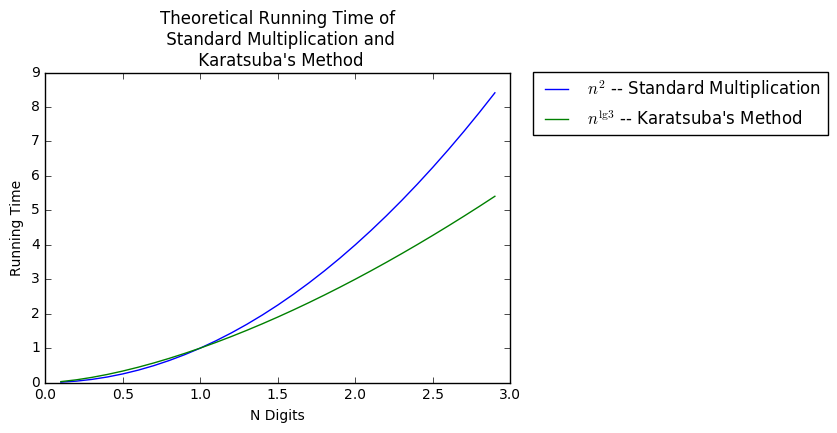

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
temp1 = [i*0.1 for i in range(1,30)]
plt.title("Theoretical Running Time of\n Standard Multiplication and\n Karatsuba's Method")
plt.xlabel("N Digits")
plt.ylabel("Running Time")
plt.plot(temp1, [i**2 for i in temp1], label="$n^2$ -- Standard Multiplication")
plt.plot(temp1, [i**(math.log10(3)/math.log10(2)) for i in temp1], label="$n^{\lg3}$ -- Karatsuba's Method")
plt.legend(bbox_to_anchor=(1.7, 1.03))

<h3 align=center>
ALGORITHM DESCRIPTION
</h3>
The algorithm developed for this project is based on the lectures about divide-and-conquer algorithm, namely Karatsuba's method. This project requires to implement the two functions below, and a driver program.

<b>void main()</b>
The driver program which uses the PosInt class will generate all our experimental results. The base case used for the driver is $16^1$ (hex-based to the power of 1).

For each n-digit size iteration, a hex character is appended to a string which is then converted to a const char* variable. Then, the variable is passed to the PosInt read() function to set the n-digit. 

<code>
PosInt x
string temp
for(i=initialN; i < totalDigits; i++)
    temp += "F"
    ...
    x.read(temp.c_str())
    ...
</code>
Example with base case $16^1$:<br/>
string value = "F" = [F] = 1 digit<BR/>
string value = "FF" = [F,F] = 2 digits<BR/>
string value = "FFF" = [F,F,F] = 3 digits<BR/>

See the results section for more details.


<b>void PosInt::fastMul (const PosInt& x)</b>
This function is mainly to set up the prerequisites before calling the fastMulArray() function. It does the following:
<ul>
<li>Setting up variables and some similar statements in mul() function.
<li>Makes sure the multipland and multiplier arrays are the same array length.
<li>Resize the digit vector to $maxlen*2$ that will hold the result.
</ul>


<b>void PosInt::fastMulArray (int* dest, const int* x, const int* y, int len)</b>
This function is the main component of this project which calculates the product of the two number arrays passed to it. It does the following:
<ul>
<li>Calls mulArray() when $len==1$ -- single digit multiplication.
<li>Splits x and y arrays into $x_0$, $x_1$, $y_0$, and $y_1$ .
<li>Calculate the xsum and ysum.
<li>Make three recursive calls.
<li>Combine them, and return the product.
</ul>


The algorithm for the standard multiplication is also given below to compare the implementation of the functions will affect the running time.
 
Throughout this report, we will assume that the array are <b>zero-indexed</b> to keep consistency with the submitted code.


 <h4>Standard Multiplication</h4>
 First, let us look at the variables used for the standard multiplication:
 <ul>
 <li>dest - This is the array where the results will be stored.
 <li>x - Array of numbers that serves as the multiplicand.
 <li>xlen - Array length of x.
 <li>y - Array of numbers that serves as the multiplier.
 <li>ylen - Array length of y.
 <li>B - Base case for all the numbers  e.g. $16^1$ for hex, $10^2$ for base 100, etc.
 </ul>

In [ ]:
## Standard "Grade School" Multiplication
mulArray(dest, x, xlen, y, ylen):
    for h=0 to xlen+ylen-1: ## 2*n iterations
        dest[i] = 0 ## set to zero
    
    ## this nested for loop takes n^2 iterations
    for i=0 to xlen-1:
        for j=0 to ylen-1:
            dest[i+j] += x[i] * y[j] ## multiply single digits
            dest[i+j+1] += dest[i+j] / B ## carry out
            dest[i+j] %= B ## keep the remainder

Looking at the code, the first for loop does $2n$ iterations to clear/initialize the array where the results will be stored. However, the nested for loop takes $n^2$ iterations to perform single digit multiplication in arrays x and y.

It is easy to see from the algorithms that running time is $\theta{(n^2)}$  .


 <h4>Karatsuba's Method</h4>
 Divide - Divide the n-digit size arrays into twos. x to x0 and x1, and y to y0 and y1.<br/>
 Conquer - Conquer by performing recursive calls using the len/2 arrays.<br/>
 Combine - Combine the results from the recursive calls using add, subtract and shifts.<br/>
 
 
 Let us look at the variables used for the Karatsuba's method:
 <ul>
 <li>dest - Array where the result of the multiplication will be stored.
 <li>x - Array of numbers that serves as the multiplicand.
 <li>y - Array of numbers that serves as the multiplier.
 <li>len - Array length of x and y (same size arrays).
 <li>B - Base case for all the numbers  e.g. $16^1$ for hex, $10^2$ for base 100, etc.
 <li>x$_0$ - Lower half of the x array (index 0 is the lowest).
 <li>$x_1$ - Upper half of the x array (index len-1 is the highest).
 <li>$y_0$ - Lower half of the y array (index 0 is the lowest).
 <li>$y_1$ - Upper half of the y array (index len-1 is the highest).
 <li>xsum - Will hold the sum of $x_0$ and $x_1$ .
 <li>ysum - Will hold the sum of $y_0$ and $y_1$ .
 <li>addArray2() - Modified version of the addArray() function
 <li>subArray() - Provided function to perform array subtraction
 </ul>

In [ ]:
## Karatsuba's Method
fastMulArray(dest, x, y, len):
    if(len == 1):
        ## single-digit multiplication
        mulArray(dest, x, y, len)
    else:
        lenHalf = len/2; ## constant time O(1) 
        lenOtherHalf = len-lenHalf; ## constant time O(1)
        ## extra one to hold possible carry
        sumLength = lenOtherHalf+1; ## constant time O(1)
        
        ## dynamically allocated variables to hold temp values
        temp1 = new int[sumLength](); ## constant time O(1)
        temp2 = new int[sumLength](); ## constant time O(1)
        temp3 = new int[sumLength*2](); ## constant time O(1)

        ## get the xsum and ysum values
        ## x0+x1
        addArray2(temp1, &x[0], lenHalf, &x[lenHalf], lenOtherHalf);
        ##y0+y1
        addArray2(temp2, &y[0], lenHalf, &y[lenHalf], lenOtherHalf);

        ## remove not needed extra sumLength -- constant time O(1)
        if(temp1[sumLength-1] == 0 && temp2[sumLength-1] == 0) sumLength -= 1;
    
        ## u = karat(dest, x0+x1, y0+y1, sumLength)
        ## len/2 length
        fastMulArray(temp3, &temp1[0], &temp2[0], sumLength);
    
        ## r = karat(dest, x1, y1, lenOtherHalf)
        ## len/2 length
        fastMulArray(&dest[len], &x[lenHalf], &y[lenHalf], lenOtherHalf);
        
        ## w= karat(dest, x0, y0, lenHalf)
        ## len/2 length
        fastMulArray(&dest[0], &x[0], &y[0], lenHalf);
    
        ## (u-r-w)*2^(b/2)
        ## ((x0+x1)*(y0+y1) - (x1*y1) - (x0*y0)) shifted to len/2 index
        subArray(temp3, &dest[len], lenOtherHalf*2);
        subArray(temp3, &dest[0], lenHalf*2);
        ## add u to the middle section of dest array
        addArray(&dest[lenHalf], temp3, len+1);

Looking at the code, there are three (3) recursive calls of len/2 length. The general format is the same as the pseudocode from the lecture notes given below.

In [ ]:
karat(x, y);
    b = bit size of x and y
    if b == 1 return x*y
    split x into x0, x1
    split y into y0, y1
    u = karat((x0+x1),(y0+y1))
    r = karat(x1,y1)
    w = karat(x0,y0)
    prod = r2**b + (u-r-w)2**(b/2) + w
    return prod

<b>Using the Master Theorem on Karatsuba's Method:</b>

$T(n) = 3T(n/2) + \theta{(n)}$<br\>
$a=3$<br\>
$b=2$<br\>
$\log{_{b}a} = \log{_{2}3} = \lg{3} $<br/>
$n^{\log{_{2}3}} = n^{\lg{3}} \approx{n^{1.585}} $<br/>

This is case 1 of the Master Theorem<br/>
$f(n) = \theta{(n)}$ where $O{n^1}$ is smaller than ${n^{1.585}}$<br/>
So  $f(n) = O{(n^{\log{_{b}a} - \epsilon})}$ for some $\epsilon > 0$ then $f(n)$ is bounded by the function<br/>
Therefore,  $T(n) = \theta{(n^{\lg{3}})}$

The Karatsuba implementation for this project is cohesive, but different enough to highlight the gap between the experimental result and theoretical running time.

There are a few overhead costs within the Karatsuba function which affects the running time and shed light as to why it does not speedup as fast.
<ul>
<li>Dynamically allocated memory to hold the sum of $x_0$ and $x_1$ .
<li>Dynamically allocated memory to hold the sum of $y_0$ and $y_1$ .
<li>Dynamically allocated memory to hold the recursive result of karat($x_0+x_1$, $y_0+y_1$).
<li>addArray2() subroutines.
<li>subArray() subroutines.
</ul>


<h3 align=center>
HARDWARE/SOFTWARE
</h3>
The program was tested to run on the GL server and an Ubuntu 16.04 LTS virtual machine. 

The GL server is a shared resource with other students and the faculty, and so all the results shown in this report were generated in the Ubuntu virtual machine running on my personal computer.

The specifications are listed below:<br/>
Host Operating System: Windows 10 Professional<br/>
Guest Operating System: Ubuntu 16.04 LTS<br/>
Hypervisor: Hyper-V<br/>
Processor: E3-1226v3 3.3gHz to 3.7 gHz<br/>
Memory: 32gb DDR3 RAM (8gb allocated to the Ubuntu guest OS)<br/>

This report was written using Jupyter Notebook for convenience as it offers access to Python for generating tables and graphs, and LaTex text formatting.


<h3 align=center>
RESULTS
</h3>
The base case used for all the tests is $16^1$ (hex-based to the power of 1) and a trial size of 50 for each n-digit size testing per algorithm.

<b>CLOCKS_PER_SEC</b> $ = 1,000,000 = \frac{1second}{1,00,0000clock}$

The running time in milliseconds is calculated using the formula below:

$$(stop - start)clock*\frac{1 second}{1,000,000 clock}*\frac{1}{No.trials}*\frac{1,000ms}{1second}$$

<br/>
<b>There are two experimental results shown here.</b>

The first graph uses output.txt to get a general idea on where the crossover point is (around what n-digit size). Iteratively, the for loop increment uses this formula: $i = i*2 - i*\frac{3}{4}$ from $i[1,20000]$.


The second graph is to get a better resolution on the crossover point for this Karatsuba's implementation by focusing on a given range based on the data from the first graph. Iteratively, the for loop increment is $i+=10$ from $i[100,2000]$.

In [2]:
## import the output file
data = []
with open('output.txt') as f:
    for line in f:
        line = line.replace("\n","").split("\t")
        if len(line) == 6:
            if line[0] == "#digits":
                continue
            data.append(line)
f.close()

The code below calculates the theoretical running time for both standard "grade school" multiplication and Karatsuba's method based on the experimental running time of the very last n-digit size.


In [3]:
## Calculate theoretical running times for both algorithm
## using the running time of the largest n-digit size
gradeSchoolCoefficient = float(data[len(data)-1][3])/(int(data[len(data)-1][0])**2)
karatsubaCoefficient = float(data[len(data)-1][5])/(int(data[len(data)-1][0])**(math.log(3)/math.log(2)))
theoreticalGradeSchool = []
theoreticalKaratsuba = []
for i in data:
    theoreticalGradeSchool.append(gradeSchoolCoefficient*(float(i[0])**2))
    theoreticalKaratsuba.append(karatsubaCoefficient*(float(i[0])**(math.log(3)/math.log(2))))

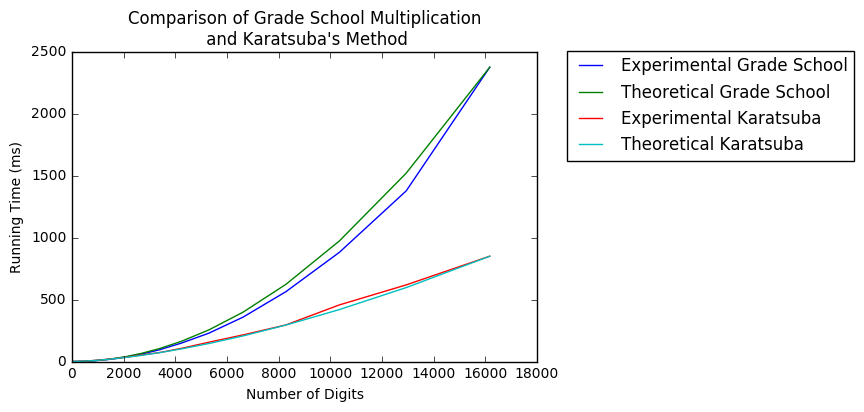

In [4]:
plt.title("Comparison of Grade School Multiplication\n and Karatsuba's Method")
plt.xlabel("Number of Digits");
plt.ylabel("Running Time (ms)");
plt.plot([i[0] for i in data], [i[3] for i in data], label="Experimental Grade School")
plt.plot([i[0] for i in data], theoreticalGradeSchool, label="Theoretical Grade School")
plt.plot([i[0] for i in data], [i[5] for i in data], label="Experimental Karatsuba")
plt.plot([i[0] for i in data], theoreticalKaratsuba, label="Theoretical Karatsuba")
plt.legend(bbox_to_anchor=(1.7, 1.03))

In [5]:
df = pd.DataFrame([ [int(i[0]),float(i[3]), float(i[5])] for i in data], columns=["Digits","GradeSchoolTime","KaratsubaTime"])
df

,Digits,GradeSchoolTime,KaratsubaTime
0,1,0.00078,0.00052
1,2,0.00064,0.00092
2,3,0.00070,0.00156
3,4,0.00078,0.00206
4,5,0.00124,0.00320
5,7,0.00122,0.00486
6,9,0.00154,0.00718
7,12,0.00220,0.01118
8,15,0.00290,0.01464
9,19,0.00444,0.02422


Comparing the graph of the experimental result against the theoretical running time, you can see a cohesive pattern for both algorithms. Karatsuba's method becomes more efficient than the standard multiplication as n increases from a sufficiently large bit size(crossover point).

Looking at the result table, at 1388 digits the standard multiplication is still faster than Karatsuba's method. However, at 1735 digits the running time for both algorithms are pretty close, and at 2169 digits the running time for Karatsuba's method becomes faster.


The result shown below examines the running time for n-digit range from 1300 to 2200  to get a better precision or higher resolution on where the crossover point is.

In [6]:
## import the output file
data1 = []
with open('outputBy10.txt') as f:
    for line in f:
        line = line.replace("\n","").split("\t")
        if len(line) == 6:
            if line[0] == "#digits":
                continue
            data1.append(line)
f.close()

In [7]:
## Calculate theoretical running times for both algorithm
## using the running time of the largest n-digit size
#gradeSchoolCoefficient = float(data1[len(data1)-1][3])/(int(data1[len(data1)-1][0])**2)
##karatsubaCoefficient = float(data1[len(data1)-1][5])/(int(data1[len(data1)-1][0])**(math.log(3)/math.log(2)))
#karatsubaCoefficient = float(data1[45][5])/(int(data1[45][0])**(math.log(3)/math.log(2)))
theoreticalGradeSchool = []
theoreticalKaratsuba = []
for i in data1:
    theoreticalGradeSchool.append(gradeSchoolCoefficient*(float(i[0])**2))
    theoreticalKaratsuba.append(karatsubaCoefficient*(float(i[0])**(math.log(3)/math.log(2))))

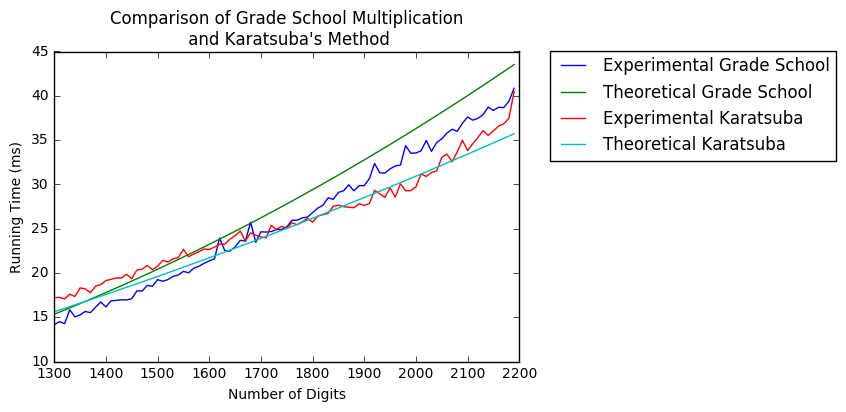

In [8]:
plt.title("Comparison of Grade School Multiplication\n and Karatsuba's Method")
plt.xlabel("Number of Digits");
plt.ylabel("Running Time (ms)");
plt.plot([i[0] for i in data1], [i[3] for i in data1], label="Experimental Grade School")
plt.plot([i[0] for i in data1], theoreticalGradeSchool, label="Theoretical Grade School")
plt.plot([i[0] for i in data1], [i[5] for i in data1], label="Experimental Karatsuba")
plt.plot([i[0] for i in data1], theoreticalKaratsuba, label="Theoretical Karatsuba")
plt.legend(bbox_to_anchor=(1.7, 1.03))

Examining the graph, you can clearly see that the grade school multiplication has a better running time at 1600 digits. However, the range from 1600 to 1800 is where the crossover point is located.

The table below only lists the running time from 1600 digits.

In [15]:
df1 = pd.DataFrame([ [int(i[0]),float(i[3]), float(i[5])] for i in data1], columns=["Digits","GradeSchoolTime","KaratsubaTime"])
df1[df1.Digits > 1590]

,Digits,GradeSchoolTime,KaratsubaTime
30,1600,21.3568,22.6407
31,1610,21.5915,22.9195
32,1620,23.9436,23.2380
33,1630,22.5266,23.2439
34,1640,22.4703,23.8078
35,1650,22.9291,24.1926
36,1660,23.6797,24.7293
37,1670,23.5905,23.5988
38,1680,25.7374,24.5295
39,1690,23.4399,24.2570


The simple code below will find the crossover point(s) as the graph shows multiple spots where there are "flips" in better running times. Finally, it will find the crossover point (the last entry) where any subsequent n larger digit size have <b>consistently</b> faster running time than the standard multiplication.

In [16]:
crossover = [-1,-1,-1]
data2 = df1.values.T.tolist()
for i in range(len(data2[0])):
    if data2[1][i] > data2[2][i] and (data2[2][i] < crossover[2] or crossover[2] == -1):
        crossover = [data2[0][i], data2[1][i], data2[2][i]]
        print(crossover)
    if data2[1][i] < data2[2][i] and crossover[2] != -1:
        crossover = [-1,-1,-1]

[1620.0, 23.9436, 23.238]
[1680.0, 25.7374, 24.5295]
[1700.0, 24.6461, 24.0749]
[1710.0, 24.6114, 23.9613]
[1750.0, 25.1986, 25.0099]


Based on the experimental results, <b>1750 digits</b> is the crossover point, and when the running time of Karatsuba's method becomes <b>consistently</b> faster than the standard multiplication's running time. 

<h3 align=center>
CONCLUSION
</h3>
We have provided a successful and efficient (but not optimal) implementation of Karatsuba's method. We have determined the crossover point (1750 digits) for this project's implementation of Karatsuba's method. At 1750 digits, the implemented divide-and-conquer algorithm becomes more efficient than the standard multiplication algorithm.

There are several factors that affected the running time of the implemented Karatsuba's method that were pointed out such as the dynamic allocation of memory within the recursive calls, and in turn caused the crossover point to be higher. Both the experimental and theoretical running times show a cohesive outcome with a sufficiently large n-digit size (crossover point), then Karatsuba's method becomes more efficient as n-digit increases.


In [6]:
## import the output file
data2 = []
with open('outputBy1.txt') as f:
    for line in f:
        line = line.replace("\n","").split("\t")
        if len(line) == 6:
            if line[0] == "#digits":
                continue
            data2.append(line)
f.close()

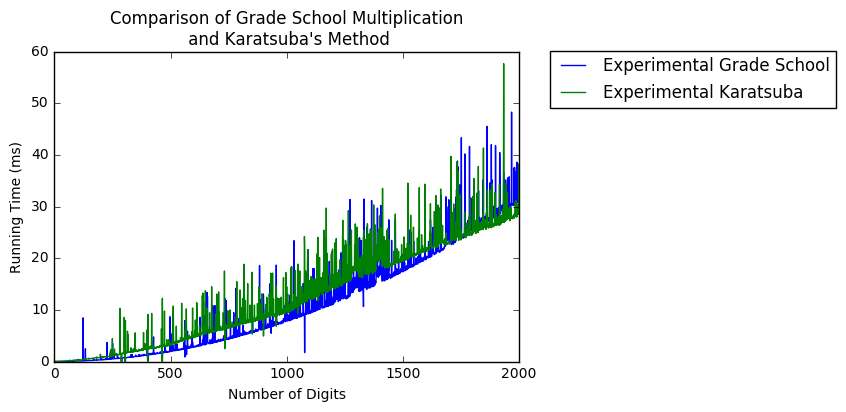

In [7]:
plt.title("Comparison of Grade School Multiplication\n and Karatsuba's Method")
plt.xlabel("Number of Digits");
plt.ylabel("Running Time (ms)");
plt.plot([i[0] for i in data2], [i[3] for i in data2], label="Experimental Grade School")
plt.plot([i[0] for i in data2], [i[5] for i in data2], label="Experimental Karatsuba")
plt.legend(bbox_to_anchor=(1.7, 1.03))

In [9]:
df2 = pd.DataFrame([ [int(i[0]),float(i[3]), float(i[5])] for i in data2], columns=["Digits","GradeSchoolTime","KaratsubaTime"])
crossover = [-1,-1,-1]
data2 = df2.values.T.tolist()
for i in range(len(data2[0])):
    if data2[1][i] > data2[2][i] and (data2[2][i] < crossover[2] or crossover[2] == -1):
        crossover = [data2[0][i], data2[1][i], data2[2][i]]
        print(crossover)
    if data2[1][i] < data2[2][i] and crossover[2] != -1:
        crossover = [-1,-1,-1]


[1.0, 0.014, 0.002]
[124.0, 8.449, 0.371]
[134.0, 2.455, 0.484]
[200.0, 1.005, 0.938]
[227.0, 3.667, 0.933]
[251.0, 3.504, 1.125]
[257.0, 1.526, 1.299]
[272.0, 1.396, 1.35]
[303.0, 0.967, 0.86]
[400.0, 4.098, 2.424]
[401.0, 1.245, 0.994]
[427.0, 4.755, 2.561]
[463.0, 1.732, 0.164]
[498.0, 8.662, 3.145]
[504.0, 5.303, 3.187]
[561.0, 7.903, 4.184]
[573.0, 5.884, 4.412]
[592.0, 4.966, 4.812]
[627.0, 8.548, 5.305]
[642.0, 11.537, 5.288]
[648.0, 8.888, 5.417]
[657.0, 13.36, 8.474]
[659.0, 12.628, 6.678]
[682.0, 10.806, 5.738]
[691.0, 10.825, 5.902]
[734.0, 12.204, 2.498]
[740.0, 11.769, 6.537]
[758.0, 7.774, 6.591]
[772.0, 9.443, 6.931]
[776.0, 7.547, 6.893]
[781.0, 14.17, 7.028]
[793.0, 8.317, 7.324]
[797.0, 8.083, 7.267]
[852.0, 5.741, 5.307]
[880.0, 10.953, 9.949]
[882.0, 8.7, 8.565]
[883.0, 18.554, 8.517]
[888.0, 11.927, 8.482]
[890.0, 9.19, 8.216]
[899.0, 13.075, 8.51]
[900.0, 12.817, 4.928]
[927.0, 15.024, 8.75]
[940.0, 12.255, 11.313]
[955.0, 18.662, 6.818]
[992.0, 10.858, 9.292]
[10